## Sentiment Analysis on Sustainability (Greenenergy and Globalwarming)


In [6]:
# general imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#preprocessing
import calendar
# import emoji
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Naive Bayes classifier process
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# rnn
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding, Dropout,Activation,LSTM
from tensorflow.keras.layers import TextVectorization


#transformers
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizerFast
from transformers import AutoTokenizer,BertTokenizer
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#sentiment extraction
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



# general imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#preprocessing
import calendar
# import emoji
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
from sklearn import preprocessing
# from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Naive Bayes classifier process
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# rnn
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding, Dropout,Activation,LSTM
from tensorflow.keras.layers import TextVectorization
from keras.layers import Bidirectional

# General libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model
import joblib
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# preprocessing libraries
import calendar
import re
import string
from tqdm import tqdm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('vader_lexicon')
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
import unidecode

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers

#Naive Bayes classifier process
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#Deep learning 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding, Dropout,Activation,LSTM
from keras import regularizers
from keras import initializers

#transformers
from transformers import BertTokenizer
from transformers import AutoTokenizer,BertTokenizer
from transformers import TFBertModel,BertModel
from transformers import RobertaTokenizer
from transformers import TFRobertaModel
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertModel
from transformers import TFAutoModel



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jomodi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jomodi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jomodi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jomodi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jomodi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jomodi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jomodi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jomodi/nltk_data...
[nltk_dat

In [7]:
# Reading an Excel file into a Pandas DataFrame

df1 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/#GreenEnergy.xlsx', sheet_name='Tweets')
df2 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/#GreenEnergy-1.xlsx', sheet_name='Tuits')
df3 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/#GreenEnergy-2.xlsx', sheet_name='Tuits')
df4 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/#GreenEnergy-3.xlsx', sheet_name='Tuits')
df5 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/#GreenEnergy-4.xlsx', sheet_name='Tuits')
df6 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/#GreenEnergy-5.xlsx', sheet_name='Tuits')
df7 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/#GreenEnergy-6.xlsx', sheet_name='Tuits')
df8 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/evelynd data/#ClimateChange.xlsx', sheet_name='Tweets')
df9 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/evelynd data/#ClimateChange-1.xlsx', sheet_name='Tweets')
df10 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/evelynd data/#ClimateChange-2.xlsx', sheet_name='Tweets')
df11 = pd.read_excel('/Users/jomodi/Desktop/gpu/project/green energy data 70,000/evelynd data/#ClimateChange-3.xlsx', sheet_name='Tweets')


In [8]:
# Concatenating the dataframes 

df = pd.concat([df1, df2, df3, df4, df5, df6,df7], ignore_index=True)


#  rename the columns 
df.columns = ['User', 'Username', 'UTC Date', 'text', 'Binders', 'Permalink', 'Retweet Count', 'Likes Count', 'Tweet Value']


In [9]:
df

,User,Username,UTC Date,text,Binders,Permalink,Retweet Count,Likes Count,Tweet Value
0,Lawanna Pond,@LawannaPond,2023-08-19 08:51:05,@MartiniGuyYT @dioneprotocol the next moonshot...,NaN,https://www.twitter.com/user/status/1692821476...,0,0,0.10
1,Lawanna Pond,@LawannaPond,2023-08-19 08:51:05,@chrisleao I bought some more #DIONE and you s...,NaN,https://www.twitter.com/user/status/1692821474...,0,0,0.09
2,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@MrBarryCrypto $Dione\nBeen accumulating this ...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.09
3,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptogems555 @dioneprotocol the next moonsho...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.10
4,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptojack I bought some more #DIONE and you ...,NaN,https://www.twitter.com/user/status/1692821471...,0,0,0.09
...,...,...,...,...,...,...,...,...,...
61546,Chesco Hi-Tech General Trading Ltd,@ChescoHitech,2023-08-19 10:32:35,"By embracing solar solutions, we at Chesco Hi-...",NaN,https://www.twitter.com/user/status/1692847017...,1,0,0.02
61547,☕ Wαƙҽ Uρ NJ 🇺🇸,@wakeupnj,2023-08-19 10:03:17,Think #windenergy is #GreenEnergy?\nCheck out ...,NaN,https://www.twitter.com/user/status/1692839646...,19,23,9.03
61548,Jim Pfaff,@jimpfaff,2023-08-19 09:49:31,Excellent points. The #GreenEnergy \n#ClimateE...,NaN,https://www.twitter.com/user/status/1692836180...,24,73,83.13
61549,Glennie C,@69Marine,2023-08-19 09:28:13,Explain how @JoeBiden is screwing the #USA wit...,NaN,https://www.twitter.com/user/status/1692830819...,0,0,33.84


In [10]:
# Concatenate the dataframes 

df2 = pd.concat([df8, df9, df10, df11], ignore_index=True)

#  rename the columns 
df2.columns = ['User', 'Username', 'UTC Date', 'text', 'Binders', 'Permalink', 'Retweet Count', 'Likes Count', 'Tweet Value']


In [11]:
df2

,User,Username,UTC Date,text,Binders,Permalink,Retweet Count,Likes Count,Tweet Value
0,AI Institute UK,@aiinstituteuk,2023-09-07 07:19:22,"Climate Tech Summit UK, 2023\nhttps://t.co/e3b...",NaN,https://www.twitter.com/user/status/1699683764...,2,3,23.23
1,Green Growth Asia Foundation,@GreenGrowthAsia,2023-09-07 07:17:34,Our Carbon Literacy Training Course is an accr...,NaN,https://www.twitter.com/user/status/1699683311...,1,0,0.03
2,PHD Chamber,@phdchamber,2023-09-07 07:17:30,#ICS2023 #InternationalClimateSummit #sustaina...,NaN,https://www.twitter.com/user/status/1699683293...,1,2,33.63
3,OnBRM,@OnBRM,2023-09-07 07:17:04,The death toll from heavy rains in southern Br...,NaN,https://www.twitter.com/user/status/1699683185...,0,0,0.42
4,NowGreen 🌱,@NowGreenRefi,2023-09-07 07:17:00,🔁 Sustainable finance is a key solution to add...,NaN,https://www.twitter.com/user/status/1699683166...,0,3,16.06
...,...,...,...,...,...,...,...,...,...
35002,His Royal Huwness🐟Aitch NOT haitch🦂,@JohnHuwEvans2,2023-09-07 07:36:48,#emergencymeasures #ClimateChange #GlobalWarmi...,NaN,https://www.twitter.com/user/status/1699688152...,0,0,5.39
35003,Abhilash Shukla,@AbhilashShuklaa,2023-09-07 07:33:47,New 98% Reflective White Paint Could Offset #g...,NaN,https://www.twitter.com/user/status/1699687392...,0,3,9.28
35004,UNDP in Georgia 🇺🇳🇬🇪,@UNDPGeorgia,2023-09-07 07:29:01,Women from 🇬🇪's village take #ClimateAction le...,NaN,https://www.twitter.com/user/status/1699686194...,1,8,16.41
35005,Abdusattor Esoev,@AbdusattorEsoev,2023-09-07 07:26:24,#ClimateChange is driving more intense heatwav...,NaN,https://www.twitter.com/user/status/1699685532...,5,20,5.11


In [12]:
# concatenating dataframes to a single dataframe 
df = pd.concat([df, df2], ignore_index=True)

In [13]:
df

,User,Username,UTC Date,text,Binders,Permalink,Retweet Count,Likes Count,Tweet Value
0,Lawanna Pond,@LawannaPond,2023-08-19 08:51:05,@MartiniGuyYT @dioneprotocol the next moonshot...,NaN,https://www.twitter.com/user/status/1692821476...,0,0,0.10
1,Lawanna Pond,@LawannaPond,2023-08-19 08:51:05,@chrisleao I bought some more #DIONE and you s...,NaN,https://www.twitter.com/user/status/1692821474...,0,0,0.09
2,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@MrBarryCrypto $Dione\nBeen accumulating this ...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.09
3,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptogems555 @dioneprotocol the next moonsho...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.10
4,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptojack I bought some more #DIONE and you ...,NaN,https://www.twitter.com/user/status/1692821471...,0,0,0.09
...,...,...,...,...,...,...,...,...,...
96553,His Royal Huwness🐟Aitch NOT haitch🦂,@JohnHuwEvans2,2023-09-07 07:36:48,#emergencymeasures #ClimateChange #GlobalWarmi...,NaN,https://www.twitter.com/user/status/1699688152...,0,0,5.39
96554,Abhilash Shukla,@AbhilashShuklaa,2023-09-07 07:33:47,New 98% Reflective White Paint Could Offset #g...,NaN,https://www.twitter.com/user/status/1699687392...,0,3,9.28
96555,UNDP in Georgia 🇺🇳🇬🇪,@UNDPGeorgia,2023-09-07 07:29:01,Women from 🇬🇪's village take #ClimateAction le...,NaN,https://www.twitter.com/user/status/1699686194...,1,8,16.41
96556,Abdusattor Esoev,@AbdusattorEsoev,2023-09-07 07:26:24,#ClimateChange is driving more intense heatwav...,NaN,https://www.twitter.com/user/status/1699685532...,5,20,5.11


# Data Cleaning

In [ ]:
# Cheking for duplicates
df.duplicated().sum()

In [15]:
# dropping duplicates
df = df.drop_duplicates()

In [16]:
df

,User,Username,UTC Date,text,Binders,Permalink,Retweet Count,Likes Count,Tweet Value
0,Lawanna Pond,@LawannaPond,2023-08-19 08:51:05,@MartiniGuyYT @dioneprotocol the next moonshot...,NaN,https://www.twitter.com/user/status/1692821476...,0,0,0.10
1,Lawanna Pond,@LawannaPond,2023-08-19 08:51:05,@chrisleao I bought some more #DIONE and you s...,NaN,https://www.twitter.com/user/status/1692821474...,0,0,0.09
2,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@MrBarryCrypto $Dione\nBeen accumulating this ...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.09
3,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptogems555 @dioneprotocol the next moonsho...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.10
4,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptojack I bought some more #DIONE and you ...,NaN,https://www.twitter.com/user/status/1692821471...,0,0,0.09
...,...,...,...,...,...,...,...,...,...
96553,His Royal Huwness🐟Aitch NOT haitch🦂,@JohnHuwEvans2,2023-09-07 07:36:48,#emergencymeasures #ClimateChange #GlobalWarmi...,NaN,https://www.twitter.com/user/status/1699688152...,0,0,5.39
96554,Abhilash Shukla,@AbhilashShuklaa,2023-09-07 07:33:47,New 98% Reflective White Paint Could Offset #g...,NaN,https://www.twitter.com/user/status/1699687392...,0,3,9.28
96555,UNDP in Georgia 🇺🇳🇬🇪,@UNDPGeorgia,2023-09-07 07:29:01,Women from 🇬🇪's village take #ClimateAction le...,NaN,https://www.twitter.com/user/status/1699686194...,1,8,16.41
96556,Abdusattor Esoev,@AbdusattorEsoev,2023-09-07 07:26:24,#ClimateChange is driving more intense heatwav...,NaN,https://www.twitter.com/user/status/1699685532...,5,20,5.11


In [17]:
# checking for duplicates in text column
df['text'].duplicated().sum()

17789

In [18]:
# getting  duplicates in text column
duplicates_mask = df.duplicated(subset='text', keep=False)
duplicates_text_df = df[duplicates_mask]
duplicates_text_df

,User,Username,UTC Date,text,Binders,Permalink,Retweet Count,Likes Count,Tweet Value
1,Lawanna Pond,@LawannaPond,2023-08-19 08:51:05,@chrisleao I bought some more #DIONE and you s...,NaN,https://www.twitter.com/user/status/1692821474...,0,0,0.09
2,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@MrBarryCrypto $Dione\nBeen accumulating this ...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.09
3,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptogems555 @dioneprotocol the next moonsho...,NaN,https://www.twitter.com/user/status/1692821472...,0,0,0.10
4,Lawanna Pond,@LawannaPond,2023-08-19 08:51:04,@cryptojack I bought some more #DIONE and you ...,NaN,https://www.twitter.com/user/status/1692821471...,0,0,0.09
8,Lawanna Pond,@LawannaPond,2023-08-19 08:51:03,@100xAltcoinGems @dioneprotocol is the best ge...,NaN,https://www.twitter.com/user/status/1692821466...,0,1,0.09
...,...,...,...,...,...,...,...,...,...
96412,WoodCentralAu,@WoodCentralAU1,2023-09-07 13:14:26,Global Forestry Coalition's Move for Climate C...,NaN,https://www.twitter.com/user/status/1699773119...,0,0,0.18
96432,Kari Joys MS,@KariJoys,2023-09-07 12:30:18,"Clean up your mess! ~Love, #MotherEarth #JoyT...",NaN,https://www.twitter.com/user/status/1699762013...,0,1,472.23
96473,Robert Pujol i Vives,@rpujolvives,2023-09-07 10:52:55,The reality is that It matters to nobody https...,NaN,https://www.twitter.com/user/status/1699737504...,0,0,4.09
96474,Robert Pujol i Vives,@rpujolvives,2023-09-07 10:52:43,#Antarctica is collapsing as #Arctic https://t...,NaN,https://www.twitter.com/user/status/1699737455...,0,0,4.09


In [19]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96354 entries, 0 to 96557
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           96353 non-null  object        
 1   Username       96354 non-null  object        
 2   UTC Date       96354 non-null  datetime64[ns]
 3   text           96354 non-null  object        
 4   Binders        0 non-null      float64       
 5   Permalink      96354 non-null  object        
 6   Retweet Count  96354 non-null  int64         
 7   Likes Count    96354 non-null  int64         
 8   Tweet Value    96354 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 7.4+ MB


In [20]:
# Dropping binders column
df.drop(columns=['Binders'], inplace=True)

In [21]:
# dropping duplicatesusind text column
df.drop_duplicates(subset='text', keep='first', inplace=True)


In [22]:
# Converting date/time columns to datetime format and checking data types
df["UTC Date"] = pd.to_datetime(df["UTC Date"])


# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78565 entries, 0 to 96557
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   User           78564 non-null  object        
 1   Username       78565 non-null  object        
 2   UTC Date       78565 non-null  datetime64[ns]
 3   text           78565 non-null  object        
 4   Permalink      78565 non-null  object        
 5   Retweet Count  78565 non-null  int64         
 6   Likes Count    78565 non-null  int64         
 7   Tweet Value    78565 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 5.4+ MB


In [23]:
# Extract date and time components
# Extract the month component
df['Year'] = df['UTC Date'].dt.year
df['Month'] = df['UTC Date'].dt.month
df['Date'] = df['UTC Date'].dt.date
df['Time'] = df['UTC Date'].dt.time

In [24]:
df['Month']= df['Month'].apply(lambda x: calendar.month_abbr[x]) 
df = df.drop(['UTC Date'],axis=1)


In [ ]:
# Number Of Unique Users

In [25]:
df['Username'].nunique()

24414

# Distribution of Tweet by Month

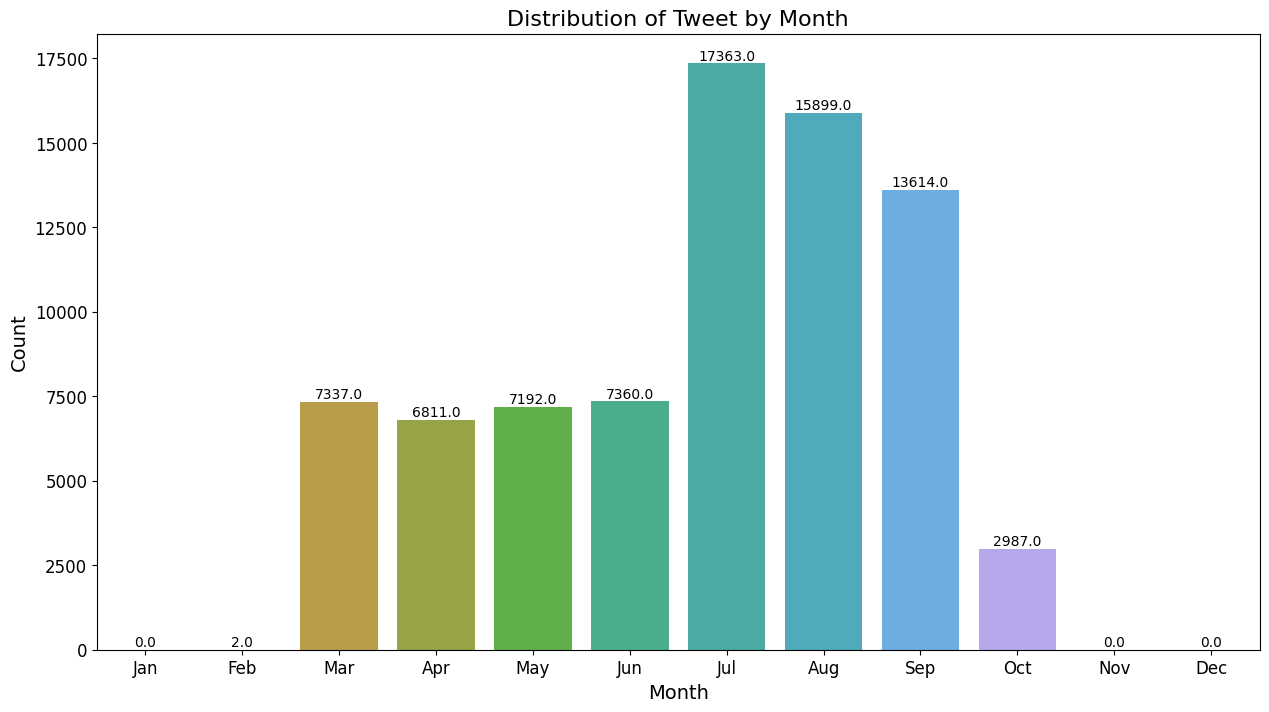

In [27]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=df['Month'], data=df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Adding count at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_title('Distribution of Tweet by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Save the plot
plt.savefig('Distribution of Tweet by Month.png')

plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78565 entries, 0 to 96557
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           78564 non-null  object 
 1   Username       78565 non-null  object 
 2   text           78565 non-null  object 
 3   Permalink      78565 non-null  object 
 4   Retweet Count  78565 non-null  int64  
 5   Likes Count    78565 non-null  int64  
 6   Tweet Value    78565 non-null  float64
 7   Year           78565 non-null  int64  
 8   Month          78565 non-null  object 
 9   Date           78565 non-null  object 
 10  Time           78565 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 7.2+ MB


## Text Preprocessing

In [29]:
# defining another function to remove emojis and numbers, tokenize and stem words.
def preprocess_text(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               "]+", flags=re.UNICODE)

    
    
   
    # Remove mentions (e.g., @username)
    text = re.sub(r'@[^ ]+', '', text)
    
    # Replace emojis with empty string

    text=emoji_pattern.sub(r'', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
     #remove twitter Return handles (RT @xxx:)
    text = re.sub( "rt @[\w]*:", '', text) 
    
    #remove rt
    text = re.sub(r'^rt\s', '', text)
    
    #rem ove twitter handles (@xxx)
    text = re.sub( "@[\w]*", '', text)
    
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    #function to remove special characters
    text = re.sub(r'[^a-zA-z0-9\s]', '', text)
    
    # Tokenize words
    words = word_tokenize(text)
    
#     #stem words
#     stemmer = PorterStemmer()
#     words = [stemmer.stem(word) for word in words]

    lemmatizer = WordNetLemmatizer()
    # Lemmatize words instead of stemming
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text
df['text']=df['text'].apply(preprocess_text)
df.head(20)

,User,Username,text,Permalink,Retweet Count,Likes Count,Tweet Value,Year,Month,Date,Time
0,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821476...,0,0,0.10,2023,Aug,2023-08-19,08:51:05
1,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821474...,0,0,0.09,2023,Aug,2023-08-19,08:51:05
2,Lawanna Pond,@LawannaPond,Dione Been accumulating this alpha since month...,https://www.twitter.com/user/status/1692821472...,0,0,0.09,2023,Aug,2023-08-19,08:51:04
3,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821472...,0,0,0.10,2023,Aug,2023-08-19,08:51:04
4,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821471...,0,0,0.09,2023,Aug,2023-08-19,08:51:04
5,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821469...,0,0,0.10,2023,Aug,2023-08-19,08:51:04
6,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821468...,0,0,0.10,2023,Aug,2023-08-19,08:51:03
7,Lawanna Pond,@LawannaPond,Dione Been accumulating this alpha since month...,https://www.twitter.com/user/status/1692821467...,0,0,0.09,2023,Aug,2023-08-19,08:51:03
8,Lawanna Pond,@LawannaPond,is the best gem now to hold Im hearing that th...,https://www.twitter.com/user/status/1692821466...,0,1,0.09,2023,Aug,2023-08-19,08:51:03
9,Lawanna Pond,@LawannaPond,Have you grabbed your bag of DIONE yet If not ...,https://www.twitter.com/user/status/1692821465...,0,0,0.10,2023,Aug,2023-08-19,08:51:03


In [30]:
df['text']

0        the next moonshot Based Dev and team also amaz...
1        I bought some more and you should too It is th...
2        Dione Been accumulating this alpha since month...
3        the next moonshot Based Dev and team also amaz...
4        I bought some more and you should too It is th...
                               ...                        
96553    One day a week shut down everything Encourage ...
96554              New Reflective White Paint Could Offset
96555    Women from s village take leading the way with...
96556    is driving more intense heatwaves which in tur...
96557                    SALMAP No SALnowhere NHC forecast
Name: text, Length: 78565, dtype: object

# Labelling 

In [31]:
# Defining function to get value counts
def get_value_counts(col_name, analyzer_name): 
    count = pd.DataFrame(df[col_name].value_counts())
    percentage = pd.DataFrame(df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
   
    return value_counts_df

In [32]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df['Polarity_score'] = df['text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df['Polarity_cmp_score'] = df['Polarity_score'].apply(lambda score_dict: score_dict['compound'])
neutral_thresh = 0.05
# Categorize scores into the sentiments of positive, neutral or negative
df['Sentiment'] = df['Polarity_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

df['Polarity_cmp_score'].describe()

count    78565.000000
mean         0.238258
std          0.462462
min         -0.984300
25%          0.000000
50%          0.273200
75%          0.642100
max          0.986700
Name: Polarity_cmp_score, dtype: float64

In [34]:
# Call the 'get_value_counts' function to obtain a DataFrame of sentiment counts using 'NLTK Vader'
# and store it in the 'sentiment_df' variable.
sentiment_df = get_value_counts('Sentiment','NLTK Vader')
sentiment_df

,sentiment,counts,percentage
0,Negative,15292,19.46
1,Neutral,17406,22.15
2,Positive,45867,58.38


# Plotting Sentiment distribution

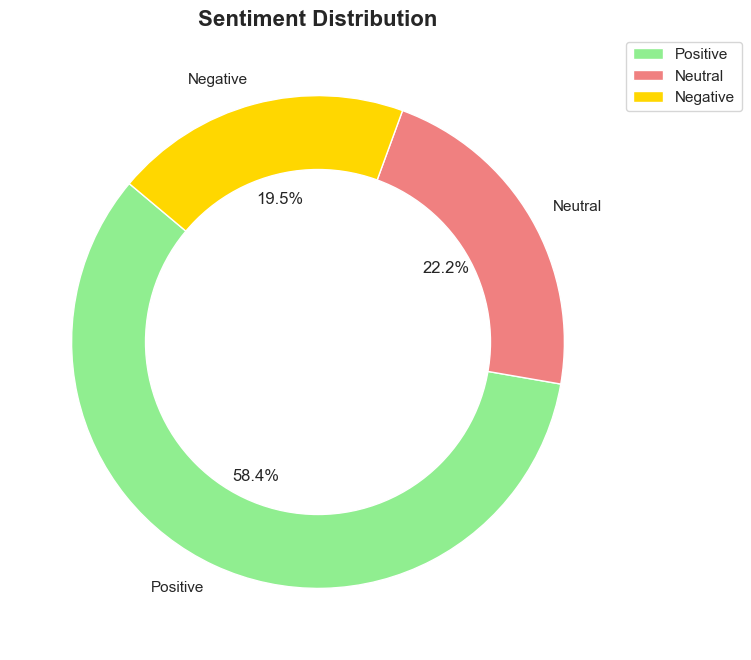

In [38]:
# Calculate the counts of each sentiment category
sentiment_counts = df["Sentiment"].value_counts()

# Defining colors for each sentiment category
colors = ['lightgreen', 'lightcoral', 'gold', 'lightblue']

# Create a pie chart with customizations
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')

# Add a legend
plt.legend(sentiment_counts.index, loc='upper right', bbox_to_anchor=(1.2, 1))

# Add a shadow for 3D effect
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

# Save the plot
plt.savefig('Sentiment Distribution.png')

plt.show()


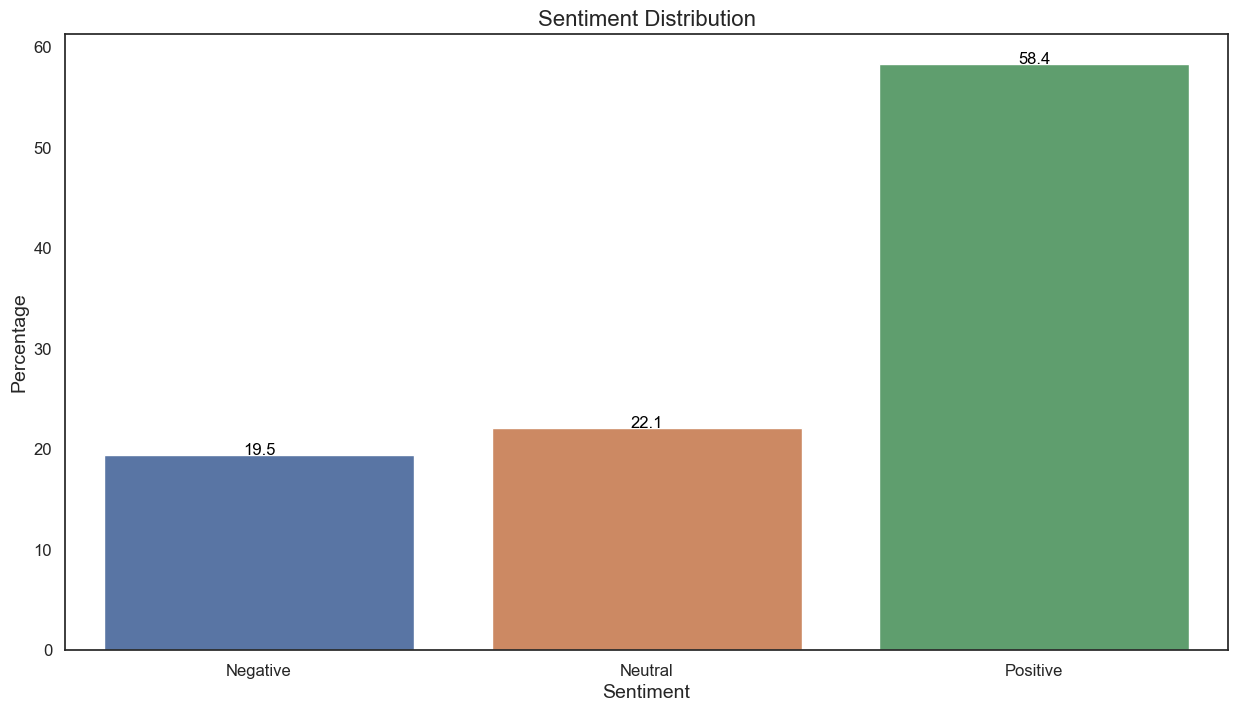

In [35]:
sns.set_theme(style="white")
plt.figure(figsize=(15, 8))

ax = sns.barplot(x="sentiment", y="percentage", data=sentiment_df)
ax.set_title('Sentiment Distribution', fontsize=16)
ax.set_xlabel('Sentiment', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

for index, row in sentiment_df.iterrows():
    ax.text(row.name, row.percentage, round(row.percentage, 1), color='black', ha="center")

# Save the plot
plt.savefig('Sentiment Distribution.png')

plt.show()


# Tweet Sentiments Over Months

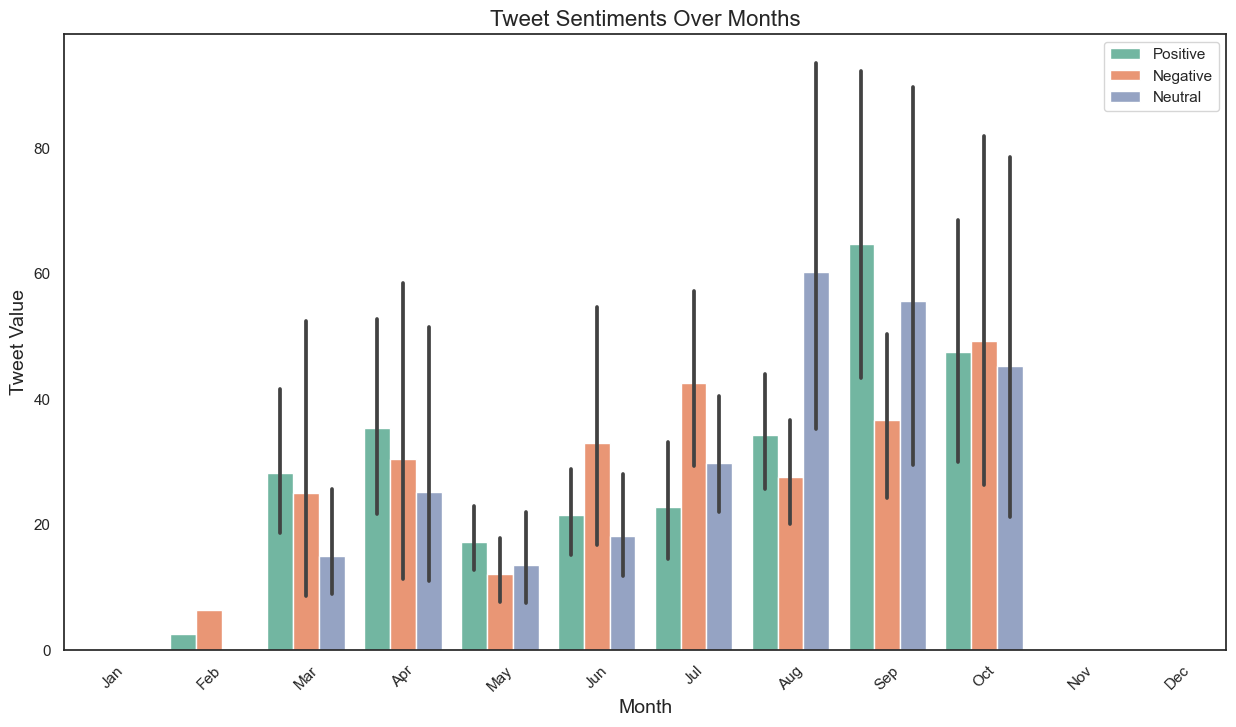

In [36]:

# Set the dark theme
sns.set_theme(style="white")

# Create a figure with a specified size
plt.figure(figsize=(15, 8))

# Create the bar plot with custom color palette
sns.barplot(x='Month', y='Tweet Value', data=df, hue='Sentiment', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette='Set2')


# Add labels and title
plt.xlabel('Month', fontsize=14)
plt.ylabel('Tweet Value', fontsize=14)
plt.title('Tweet Sentiments Over Months', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust legend position
plt.legend(loc='upper right')

# Save the plot
plt.savefig('Tweet Sentiments Over Months.png')

plt.show()



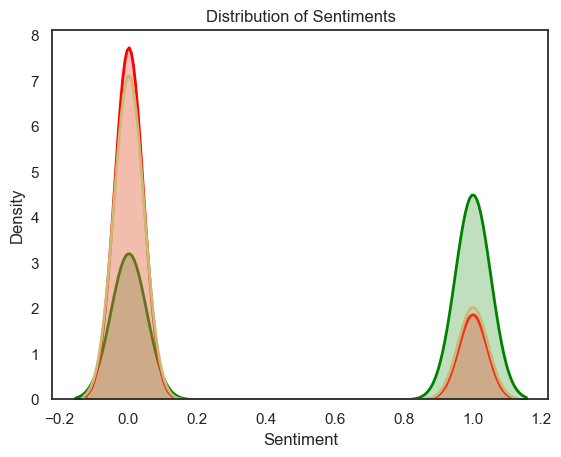

In [37]:

sns.distplot(df["Sentiment"] == 'Positive', hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Sentiment"] == 'Negative', hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Sentiment" ] == 'Neutral', hist=False, kde=True, 
             bins=int(180/5), color = 'y', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# Add title and labels
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Density')

# # Add legend
# plt.legend()

# Show the plot
plt.show()

# Exploratory data analysis 

In [3]:
# Top 50 positive tweets

In [39]:
df

,User,Username,text,Permalink,Retweet Count,Likes Count,Tweet Value,Year,Month,Date,Time,Polarity_score,Polarity_cmp_score,Sentiment
0,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821476...,0,0,0.10,2023,Aug,2023-08-19,08:51:05,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6421,Positive
1,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821474...,0,0,0.09,2023,Aug,2023-08-19,08:51:05,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.7645,Positive
2,Lawanna Pond,@LawannaPond,Dione Been accumulating this alpha since month...,https://www.twitter.com/user/status/1692821472...,0,0,0.09,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...",-0.2960,Negative
3,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821472...,0,0,0.10,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6421,Positive
4,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821471...,0,0,0.09,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.7645,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96553,His Royal Huwness🐟Aitch NOT haitch🦂,@JohnHuwEvans2,One day a week shut down everything Encourage ...,https://www.twitter.com/user/status/1699688152...,0,0,5.39,2023,Sep,2023-09-07,07:36:48,"{'neg': 0.139, 'neu': 0.811, 'pos': 0.05, 'com...",-0.7050,Negative
96554,Abhilash Shukla,@AbhilashShuklaa,New Reflective White Paint Could Offset,https://www.twitter.com/user/status/1699687392...,0,3,9.28,2023,Sep,2023-09-07,07:33:47,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
96555,UNDP in Georgia 🇺🇳🇬🇪,@UNDPGeorgia,Women from s village take leading the way with...,https://www.twitter.com/user/status/1699686194...,1,8,16.41,2023,Sep,2023-09-07,07:29:01,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4404,Positive
96556,Abdusattor Esoev,@AbdusattorEsoev,is driving more intense heatwaves which in tur...,https://www.twitter.com/user/status/1699685532...,5,20,5.11,2023,Sep,2023-09-07,07:26:24,"{'neg': 0.144, 'neu': 0.685, 'pos': 0.171, 'co...",0.0240,Neutral


In [40]:
df['text']

0        the next moonshot Based Dev and team also amaz...
1        I bought some more and you should too It is th...
2        Dione Been accumulating this alpha since month...
3        the next moonshot Based Dev and team also amaz...
4        I bought some more and you should too It is th...
                               ...                        
96553    One day a week shut down everything Encourage ...
96554              New Reflective White Paint Could Offset
96555    Women from s village take leading the way with...
96556    is driving more intense heatwaves which in tur...
96557                    SALMAP No SALnowhere NHC forecast
Name: text, Length: 78565, dtype: object

In [42]:
df

,User,Username,text,Permalink,Retweet Count,Likes Count,Tweet Value,Year,Month,Date,Time,Polarity_score,Polarity_cmp_score,Sentiment
0,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821476...,0,0,0.10,2023,Aug,2023-08-19,08:51:05,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6421,Positive
1,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821474...,0,0,0.09,2023,Aug,2023-08-19,08:51:05,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.7645,Positive
2,Lawanna Pond,@LawannaPond,Dione Been accumulating this alpha since month...,https://www.twitter.com/user/status/1692821472...,0,0,0.09,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...",-0.2960,Negative
3,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821472...,0,0,0.10,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6421,Positive
4,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821471...,0,0,0.09,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.7645,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96553,His Royal Huwness🐟Aitch NOT haitch🦂,@JohnHuwEvans2,One day a week shut down everything Encourage ...,https://www.twitter.com/user/status/1699688152...,0,0,5.39,2023,Sep,2023-09-07,07:36:48,"{'neg': 0.139, 'neu': 0.811, 'pos': 0.05, 'com...",-0.7050,Negative
96554,Abhilash Shukla,@AbhilashShuklaa,New Reflective White Paint Could Offset,https://www.twitter.com/user/status/1699687392...,0,3,9.28,2023,Sep,2023-09-07,07:33:47,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
96555,UNDP in Georgia 🇺🇳🇬🇪,@UNDPGeorgia,Women from s village take leading the way with...,https://www.twitter.com/user/status/1699686194...,1,8,16.41,2023,Sep,2023-09-07,07:29:01,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4404,Positive
96556,Abdusattor Esoev,@AbdusattorEsoev,is driving more intense heatwaves which in tur...,https://www.twitter.com/user/status/1699685532...,5,20,5.11,2023,Sep,2023-09-07,07:26:24,"{'neg': 0.144, 'neu': 0.685, 'pos': 0.171, 'co...",0.0240,Neutral


In [43]:
# Top 50 positive tweets
df.nlargest(n=50, columns=['Polarity_cmp_score'])["text"]

49170    We share our best wish on the auspicious occas...
45519    Super happy to help launch the company Such a ...
28287    Happy Spring Bank Holiday Weekend Its been a b...
17447    Wishing you all a joyous and blessed filled wi...
73413    When will you hear u When Sorry but your hyste...
29448    For your better tomorrow save energy today Sav...
40997    Today is a day that ha given u a myriad of rea...
75674    Our a magical place nurturing all kind of life...
17646    Congratulations to Artisan Electrics for being...
18724    JA Solar wish you and your family a safe and b...
38581    Team wish you all a joyous and blessed Eid alF...
38896    Happy World Earth Day We at Copperpod IP wish ...
21032    MeritSun wish you a happy Dragon Boat Festival...
43457    Your visionary leadership and unwavering commi...
30278    Outstanding leadership THANK you for leading t...
84935    Nobel Committee gave Nobel prize in Economics ...
53798    Happy World OZONE DAY Join SAJ smart energy st.

In [44]:
# Top 50 negative tweets
df.nsmallest(n=50, columns=['Polarity_cmp_score'])["text"]

75357    This cause devastating environmental violence ...
70358    But STUPID DUMB ASS Republicans are FUCKING ID...
3232     Fastmoving blaze in Lahaina kill and leaf deva...
93285    Another week of devastating disaster caused by...
82263    meet to discus more war killing maiming destru...
49250    Green leader have an obsession with death kill...
71192    WORLD ON FIRE AUGUST is already likely worst y...
61533    Destroying Nature for Rent Seeking Crony Capit...
68991    MICHAEL MANN MAUI COMPOUND CLIMATE CATASTROPHE...
74213    solitary confinement is torture forced unpaid ...
64658    Hey Environmental Bitches if ur not violent or...
3517     Utah man shot killed by FBI agent after allege...
78202    Deceived amp terrified by yr of leftist screec...
69067    made this apocalyptic tragedy worse and more d...
64825    Tragedy Strikes Devastating Floods Hit India a...
80841    ryan maue denies chaos denies And this happens...
63564    Maybe is dying but It will die killing Boris J.

In [45]:
# adding length of sentence to dataframe
df['sentence_len'] = df['text'].str.len()
df.head()

,User,Username,text,Permalink,Retweet Count,Likes Count,Tweet Value,Year,Month,Date,Time,Polarity_score,Polarity_cmp_score,Sentiment,sentence_len
0,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821476...,0,0,0.10,2023,Aug,2023-08-19,08:51:05,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6421,Positive,96
1,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821474...,0,0,0.09,2023,Aug,2023-08-19,08:51:05,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.7645,Positive,164
2,Lawanna Pond,@LawannaPond,Dione Been accumulating this alpha since month...,https://www.twitter.com/user/status/1692821472...,0,0,0.09,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...",-0.2960,Negative,166
3,Lawanna Pond,@LawannaPond,the next moonshot Based Dev and team also amaz...,https://www.twitter.com/user/status/1692821472...,0,0,0.10,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6421,Positive,96
4,Lawanna Pond,@LawannaPond,I bought some more and you should too It is th...,https://www.twitter.com/user/status/1692821471...,0,0,0.09,2023,Aug,2023-08-19,08:51:04,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...",0.7645,Positive,164


In [46]:
# Add a new column 'text_len' to the DataFrame 
# The 'text_len' column will store the length (number of characters) of each text in the 'text' column
df['text_len'] = df['text'].astype(str).apply(len)

# Add a new column 'text_word_count' to the DataFrame
# The 'text_word_count' column will store the number of words in each text in the 'text' column
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Print the average length of tweets
print("Average length of tweets:", round(np.mean(df['text_len'])))

# Print the average word count of tweets
print("Average word counts of tweets:", round(np.mean(df['text_word_count'])))


Average length of tweets  117
Average word counts of tweets 21


In [47]:
max(df['sentence_len'])

269

In [48]:
# # plot of the retweets of positive and negative sentiments yearly
# sns.barplot(x='Month',y='Retweet count',data=df,hue='Sentiment')


In [49]:
# Visualization of the Sentiment Scores of Positive, Neutral & Negative Tweets

In [50]:
# df[df["Sentiment"] == 'Positive']


## Wordcloud representation of words

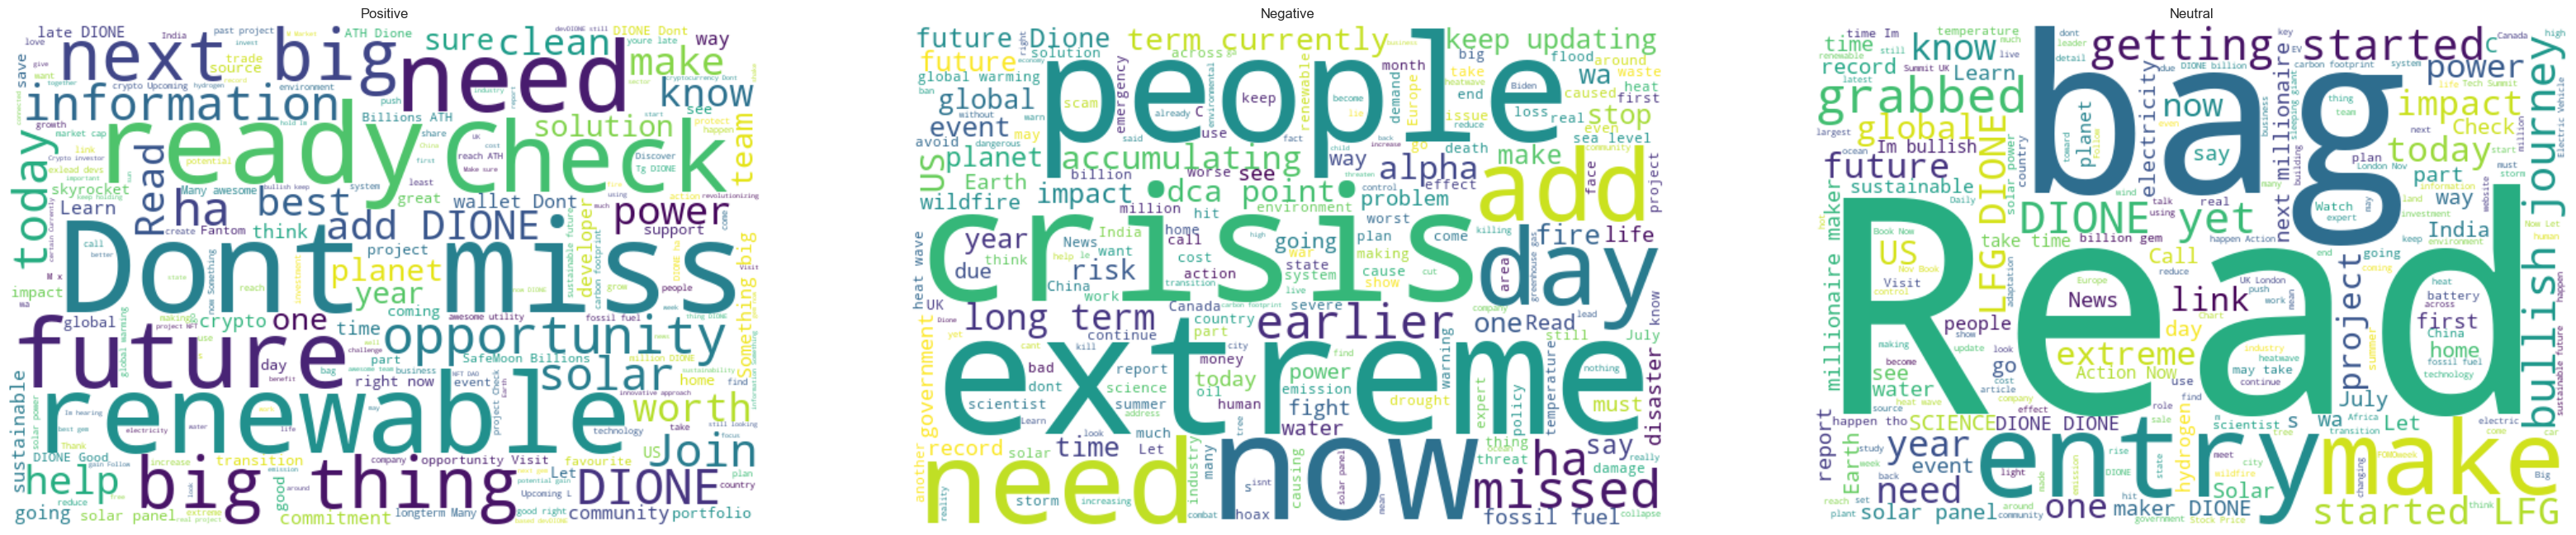

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['amp', 'https', 'co', 'rt','climate','weather','world','green','new','video','world','change','energy','will','via','u'])

# Define the positive, negative and neutral sentiments
positive_sentiment = df[df['Sentiment'] == 'Positive']['text'].tolist()
neutral_sentiment = df[df['Sentiment'] == 'Neutral']['text'].tolist()
negative_sentiment = df[df['Sentiment'] == 'Negative']['text'].tolist()
# Generate the word clouds for each sentiment
wc_positive = WordCloud(background_color='white', stopwords=stopwords, width=600, height=400).generate(' '.join(positive_sentiment))
wc_neutral = WordCloud(background_color='white', stopwords=stopwords, width=600, height=400).generate(' '.join(neutral_sentiment))
wc_negative = WordCloud(background_color='white', stopwords=stopwords, width=600, height=400).generate(' '.join(negative_sentiment ))


# Plot the word clouds

fig, axs = plt.subplots(1, 3, figsize=(40, 8))
axs[0].imshow(wc_positive, interpolation='bilinear')
axs[0].set_title('Positive')
axs[0].axis('off')
axs[1].imshow(wc_negative, interpolation='bilinear')
axs[1].set_title('Negative')
axs[1].axis('off')
axs[2].imshow(wc_neutral, interpolation='bilinear')
axs[2].set_title('Neutral')
axs[2].axis('off')
plt.show()

# Data balancing using RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [53]:
ros = RandomOverSampler()   #instantiate 
x, y = ros.fit_resample(np.array(df['text']).reshape(-1, 1), np.array(df['Sentiment']).reshape(-1, 1));



#create a dataframe for the newly balanced data
energy_sentiment = pd.DataFrame(list(zip([x[0] for x in x], y)), columns = ['text', 'Sentiment']);

In [54]:
energy_sentiment.shape

(137601, 2)

In [55]:
# Label encoding for baseline classifier

In [56]:
energy_sentiment['Sentiment'] = energy_sentiment['Sentiment'].map({'Negative':0,'Neutral':1,'Positive':2})

# Splitting Data into train,val and test

In [57]:
X = energy_sentiment['text'].values
y = energy_sentiment['Sentiment'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split to train and test

X , y = X_train, y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #split train further to val and train

In [59]:
# Let us create a copy of our split data that has been encoded using label 

y_train_le = y_train.copy()
y_valid_le = y_val.copy()
y_test_le = y_test.copy()

In [60]:
# Encode y(sentiment)

#using one hot encoder

ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_val.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 88064
VALIDATION DATA: 22016
TESTING DATA: 27521


# Basic Classifier:  Naive Bayes 

In [61]:
#we will use countvectorizer to convert text to matrix
clf = CountVectorizer()  
X_train_cv =  clf.fit_transform(X_train)
X_val_cv =clf.transform(X_val)
X_test_cv = clf.transform(X_test)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv) #to give a more informative(importance) representation text
X_train_tf = tf_transformer.transform(X_train_cv)
X_val_tf =tf_transformer.transform(X_val_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

nb_clf = MultinomialNB()  #naives bayes classifier for text
nb_clf.fit(X_train_tf, y_train_le)
val_pred = nb_clf.predict(X_val_tf)
nb_pred = nb_clf.predict(X_test_tf)

In [62]:
#getting validation accuracy
val_acc = accuracy_score(y_valid_le, val_pred)
print('Validation accuracy:', val_acc)

#evaluating the model
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

Validation accuracy: 0.8009175145348837
	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.74      0.93      0.82      9274
     Neutral       0.90      0.71      0.80      9002
    Positive       0.83      0.79      0.81      9245

    accuracy                           0.81     27521
   macro avg       0.82      0.81      0.81     27521
weighted avg       0.82      0.81      0.81     27521



# SVM

In [63]:


# Using SVC for SVM classification
svm_clf= SVC(decision_function_shape='ovr')
svm_clf.fit(X_train_tf, y_train_le)

# Predictions on validation and test sets
val_pred = svm_clf.predict(X_val_tf)
svm_pred = svm_clf.predict(X_test_tf)

# Getting validation accuracy
val_acc = accuracy_score(y_valid_le, val_pred)
print('Validation accuracy:', val_acc)

# Evaluating the SVM model
print('\tClassification Report for SVM:\n\n', classification_report(y_test_le, svm_pred, target_names=['Negative', 'Neutral', 'Positive']))


Validation accuracy: 0.9499909156976745
	Classification Report for SVM:

               precision    recall  f1-score   support

    Negative       0.94      0.97      0.96      9274
     Neutral       0.93      0.97      0.95      9002
    Positive       0.97      0.90      0.94      9245

    accuracy                           0.95     27521
   macro avg       0.95      0.95      0.95     27521
weighted avg       0.95      0.95      0.95     27521



## LSTM RNN classifier

In [64]:
#  Define some hyperparameters
max_words = 20000 # Maximum number of words to include in the tokenizer
max_len = 200 # Maximum length of each input sequence
num_classes = 3 # Number of output classes


# Preprocess the text data
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train) #converts text to integers
word_index = tokenizer.word_index
train_data = pad_sequences(train_sequences, maxlen=max_len)

val_sequences = tokenizer.texts_to_sequences(X_val)
val_data = pad_sequences(val_sequences, maxlen=max_len)  #pad sequences to max len

test_sequences = tokenizer.texts_to_sequences(X_test)
test_data = pad_sequences(test_sequences, maxlen=max_len)



print('Shape of data tensor:',train_data.shape)
print('Shape of data tensor:',val_data.shape)
print('Shape of data tensor:',test_data.shape)

Shape of data tensor: (88064, 200)
Shape of data tensor: (22016, 200)
Shape of data tensor: (27521, 200)


## Pretrained FastText + LSTM

In [65]:
# Load FastText Embeddings

In [66]:
embeddings_index = {}  #extract embeddibgs from fasttext and save in dictionary
fasttext_dir = "/Users/jomodi/Downloads/DOWNLOADS/wiki-news-300d-1M-subword.vec"
with open(fasttext_dir, encoding='utf8') as f:
    for line in f:
        values = line.split()
        if len(values) < 2:
            continue
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('found %s word vectors' % len(embeddings_index))

found 999995 word vectors


In [67]:
# Create Embedding Matrix

In [68]:
#embedding matrix
embedding_dim = 300 # Dimensionality 
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [69]:
# Define the Neural Network Model

In [70]:
#define model architecture
model1 = Sequential()

model1.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False))

model1.add(LSTM(128, return_sequences=True, kernel_initializer=initializers.glorot_uniform()))

model1.add(Dropout(0.4))

model1.add(LSTM(64, kernel_initializer=initializers.glorot_uniform()))

model1.add(Dropout(0.4))

model1.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.glorot_uniform()))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         10970700  
                                                                 
 lstm (LSTM)                 (None, None, 128)         219648    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 11,239,9

In [71]:
#train model
RNN_model_fasttext=model1.fit(train_data, y_train, validation_data=(val_data, y_valid), epochs= 5, batch_size=16)

Epoch 1/5


2023-12-05 08:44:16.478868: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x200x1x128xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x64xi1>'
loc("mps_select"("(mpsFileLoc): /

5504/5504 [==============================] - 658s 119ms/step - loss: 0.6210 - accuracy: 0.7596 - val_loss: 0.4723 - val_accuracy: 0.8332
Epoch 2/5
5504/5504 [==============================] - 652s 119ms/step - loss: 0.4246 - accuracy: 0.8533 - val_loss: 0.4082 - val_accuracy: 0.8628
Epoch 3/5
5504/5504 [==============================] - 636s 116ms/step - loss: 0.3675 - accuracy: 0.8772 - val_loss: 0.3504 - val_accuracy: 0.8856
Epoch 4/5
5504/5504 [==============================] - 624s 113ms/step - loss: 0.3345 - accuracy: 0.8911 - val_loss: 0.3321 - val_accuracy: 0.8935
Epoch 5/5
5504/5504 [==============================] - 625s 114ms/step - loss: 0.3029 - accuracy: 0.9034 - val_loss: 0.3199 - val_accuracy: 0.8956


In [72]:
result_RNN_model_fasttext =model1.predict(test_data) #predict test data

861/861 [==============================] - 11s 11ms/step


In [73]:
y_pred_fasttext=  np.zeros_like(result_RNN_model_fasttext)
y_pred_fasttext[np.arange(len(y_pred_fasttext)), result_RNN_model_fasttext.argmax(1)] = 1

In [74]:
#getting validation accuracy
val_acc = accuracy_score(y_valid_le, val_pred)
print('Validation accuracy:', val_acc)

#evaluating the model
print('\tClassification Report for RNN:\n\n',classification_report(y_test,y_pred_fasttext , target_names=['Negative', 'Neutral', 'Positive']))

Validation accuracy: 0.9499909156976745
	Classification Report for RNN:

               precision    recall  f1-score   support

    Negative       0.86      0.94      0.90      9274
     Neutral       0.89      0.90      0.89      9002
    Positive       0.94      0.85      0.89      9245

   micro avg       0.90      0.90      0.90     27521
   macro avg       0.90      0.90      0.90     27521
weighted avg       0.90      0.90      0.90     27521
 samples avg       0.90      0.90      0.90     27521



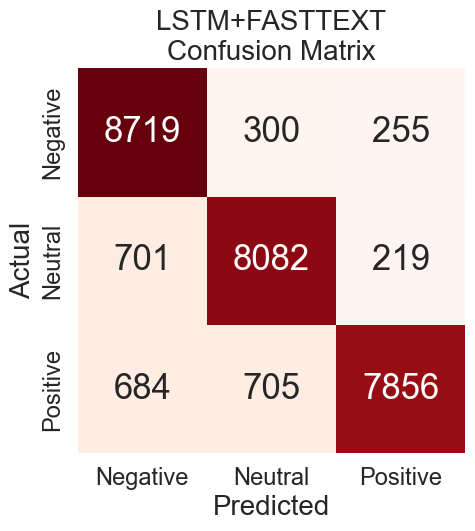

In [75]:

#define a function for confusion matrix which we will call for all the models
def conf_matrix(y, y_pred_fasttext, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred_fasttext), annot=True, cmap="Reds", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Actual', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()
    
    
    
#call confusion matrix    
conf_matrix(y_test.argmax(1), y_pred_fasttext.argmax(1),'LSTM+FASTTEXT\nConfusion Matrix')





In [76]:
df_FT = pd.DataFrame(RNN_model_fasttext.history)
df_FT["epoch"] = RNN_model_fasttext.epoch
df_FT

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.620990,0.759629,0.472259,0.833212,0
1,0.424564,0.853311,0.408242,0.862782,1
2,0.367504,0.877169,0.350430,0.885583,2
3,0.334481,0.891056,0.332106,0.893487,3
4,0.302903,0.903423,0.319902,0.895576,4


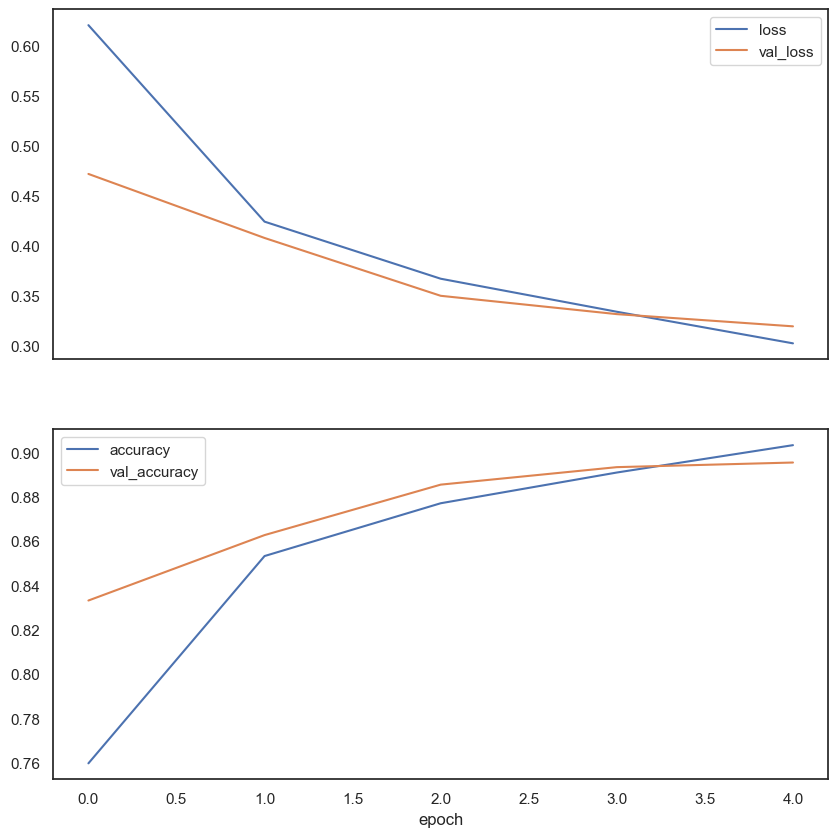

In [77]:

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
df_FT.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
df_FT.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

In [78]:
model1.save('model_lstm+fasttext.h5')  #save model

## Pretrained Glove+ LSTM

In [79]:
#file path to embedding vectors size 200 dimensions
glove_dir = "/Users/jomodi/Downloads/DOWNLOADS/glove/glove.twitter.27B.200d.txt"
embeddings_index = {}   #extract embeddibgs from GloVe and save in dictionary
with open(glove_dir, encoding='utf8') as f:
    for line in f:
        values = line.split()
        if len(values) < 2:
            continue
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
print('Found %s word vectors:'%len(embeddings_index))  

#create embedding matrix
embedding_dim = 200
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Found 1193514 word vectors:


In [80]:
#define model architecture
model2 = Sequential()

model2.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False))

model2.add(LSTM(128, return_sequences=True, kernel_initializer=initializers.glorot_uniform()))

model2.add(Dropout(0.4))

model2.add(LSTM(64, kernel_initializer=initializers.glorot_uniform()))

model2.add(Dropout(0.4))

model2.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.glorot_uniform()))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         7313800   
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         168448    
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 7,531,851
Trainable params: 218,051
Non-

In [81]:
#train model
RNN_model_GloVe=model2.fit(train_data, y_train, validation_data=(val_data, y_valid), epochs=5, batch_size=16)

Epoch 1/5


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x200x1x128xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x64xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerforma

5504/5504 [==============================] - 638s 115ms/step - loss: 0.4672 - accuracy: 0.8315 - val_loss: 0.3274 - val_accuracy: 0.8923
Epoch 2/5
5504/5504 [==============================] - 634s 115ms/step - loss: 0.2599 - accuracy: 0.9193 - val_loss: 0.2319 - val_accuracy: 0.9306
Epoch 3/5
5504/5504 [==============================] - 635s 115ms/step - loss: 0.1853 - accuracy: 0.9453 - val_loss: 0.1867 - val_accuracy: 0.9456
Epoch 4/5
5504/5504 [==============================] - 635s 115ms/step - loss: 0.1433 - accuracy: 0.9588 - val_loss: 0.1726 - val_accuracy: 0.9502
Epoch 5/5
5504/5504 [==============================] - 634s 115ms/step - loss: 0.1179 - accuracy: 0.9677 - val_loss: 0.1661 - val_accuracy: 0.9554


In [82]:
result_RNN_model_GloVe =model2.predict(test_data) #predict test

861/861 [==============================] - 12s 12ms/step


In [83]:
y_pred_glove=  np.zeros_like(result_RNN_model_GloVe)
y_pred_glove[np.arange(len(y_pred_glove)), result_RNN_model_GloVe.argmax(1)] = 1

In [84]:
# test_loss, test_accuracy = model2.evaluate(test_data,y_test)
# print('Test Accuracy:', test_accuracy)
# print('Test Loss:', test_loss)


In [85]:
#getting validation accuracy
val_acc = accuracy_score(y_valid_le, val_pred)
print('Validation accuracy:', val_acc)

# #evaluating the model
# print('\tClassification Report for RNN:\n\n',classification_report(y_test,y_pred_fasttext , target_names=['Negative', 'Neutral', 'Positive']))

Validation accuracy: 0.9499909156976745


In [86]:

#evaluating the model
print('\tClassification Report for RNN:\n\n',classification_report(y_test,y_pred_glove , target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RNN:

               precision    recall  f1-score   support

    Negative       0.93      0.98      0.96      9274
     Neutral       0.97      0.95      0.96      9002
    Positive       0.97      0.93      0.95      9245

   micro avg       0.96      0.96      0.96     27521
   macro avg       0.96      0.96      0.96     27521
weighted avg       0.96      0.96      0.96     27521
 samples avg       0.96      0.96      0.96     27521



In [87]:
df = pd.DataFrame(RNN_model_GloVe.history)
df["epoch"] = RNN_model_GloVe.epoch
df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.467178,0.831486,0.327414,0.892260,0
1,0.259925,0.919286,0.231922,0.930641,1
2,0.185298,0.945347,0.186655,0.945630,2
3,0.143255,0.958814,0.172607,0.950173,3
4,0.117889,0.967717,0.166058,0.955441,4


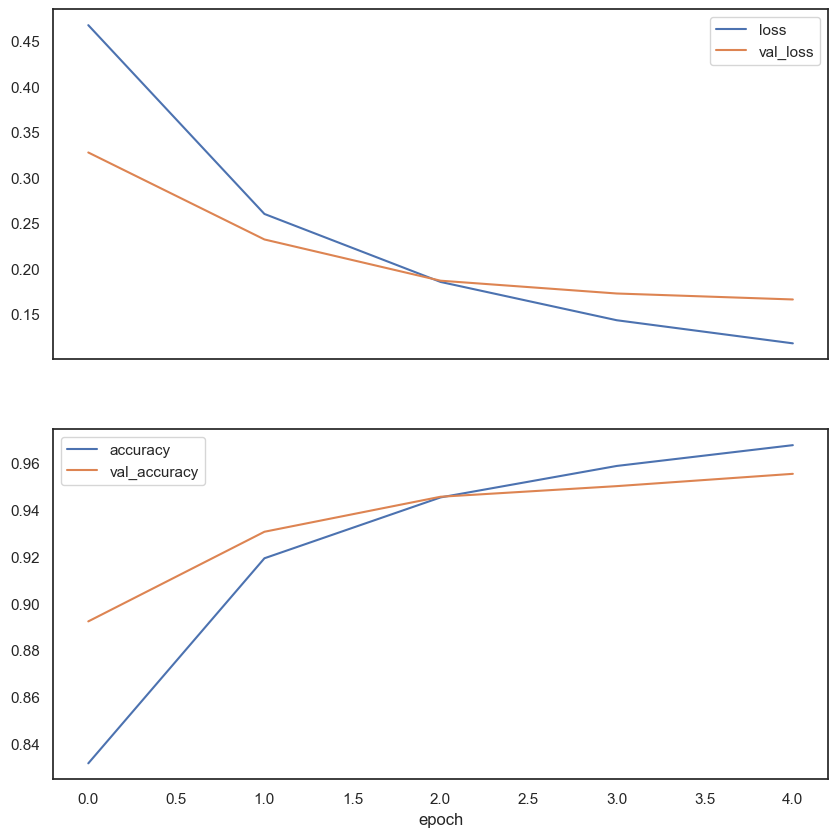

In [88]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

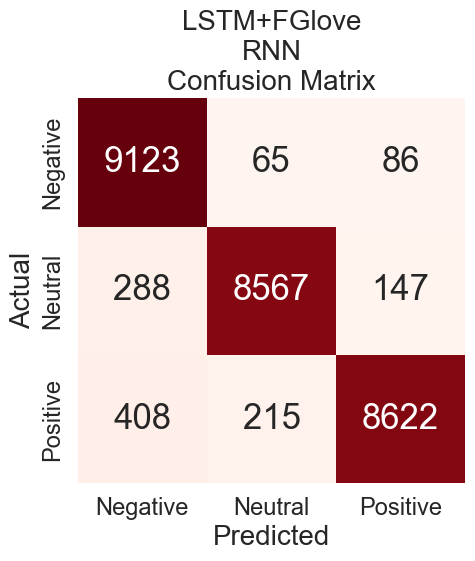

In [89]:
conf_matrix(y_test.argmax(1), y_pred_glove.argmax(1),'LSTM+FGlove\nRNN\nConfusion Matrix')


In [90]:
model2.save('model_lstm+glove.h5')


# DISTILBERT

In [91]:
# Instantiate DistilBERT tokenizer...we use the Fast version to optimize runtime
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [92]:
# Define the maximum number of words to tokenize (DistilBERT can tokenize up to 512)
MAX_LEN = 256


# Define function to encode text data in batches
def tokenize(texts,max_len=MAX_LEN): 
    input_ids = []
    attention_masks = []
    
    for i in range(len(texts)):
        
        encoded = tokenizer.encode_plus(texts[i],
                                        add_special_tokens=True,
                                        
                                        max_length=MAX_LEN,
                                        
                                        truncation=True,
                                        
                                        padding='max_length',
                                        
                                        return_attention_mask=True)
                                                                 
            
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)
    
#apply the tokenizer function to the train, validation and test sets
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)

val_input_ids, val_attention_masks = tokenize(X_val, MAX_LEN)

test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [93]:
distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [94]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [95]:
num_classes=3
def build_model(distilBERT, max_len, num_classes):
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    # Use the DistilBERT model as the base
    distilbert_model = distilBERT.from_pretrained('distilbert-base-uncased')
    sequence_output = distilbert_model([input_ids, attention_masks])[0]

    # Apply GRU layer with return sequences to capture sequential information
    gru_output = tf.keras.layers.GRU(128, return_sequences=True)(sequence_output)

    # Apply attention mechanism to focus on important features
    attention = tf.keras.layers.Attention()([gru_output, gru_output])

    # Apply global average pooling and global max pooling
    avg_pooling = tf.keras.layers.GlobalAveragePooling1D()(attention)
    max_pooling = tf.keras.layers.GlobalMaxPooling1D()(attention)

    # Concatenate the average pooling and max pooling representations
    concat = tf.keras.layers.Concatenate()([avg_pooling, max_pooling])

    # Add a dense layer with dropout for classification
    x = tf.keras.layers.Dense(256, activation='relu')(concat)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output layer with softmax activation for classification
    output = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Create the model
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compile the model with appropriate optimizer and loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
   
    #Implement learning rate scheduling
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    # Implement early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    return model

In [98]:
model3 = build_model(distilBERT, MAX_LEN,num_classes)
model3.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 tf_distil_bert_model_1 (TFDist  TFBaseModelOutput(l  66362880   ['input_1[0][0]',                
 ilBertModel)                   ast_hidden_state=(N               'input_2[0][0]']                
                                one, 256, 768),                                                   
                                 hidden_states=None                                           

In [99]:
#train model
history_distilbert = model3.fit([train_input_ids, train_attention_masks],y_train,validation_data=([val_input_ids, val_attention_masks], y_valid),
epochs=5,batch_size=32 )

Epoch 1/5


2023-12-05 10:31:33.670887: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x256x1x768xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x256x1x768xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x12x256x256xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerf

2752/2752 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8674

2023-12-05 11:25:04.707951: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


2752/2752 [==============================] - 3438s 1s/step - loss: 0.3537 - accuracy: 0.8674 - val_loss: 0.1720 - val_accuracy: 0.9390
Epoch 2/5
2752/2752 [==============================] - 3387s 1s/step - loss: 0.1385 - accuracy: 0.9540 - val_loss: 0.1169 - val_accuracy: 0.9603
Epoch 3/5
2752/2752 [==============================] - 3387s 1s/step - loss: 0.0845 - accuracy: 0.9718 - val_loss: 0.0947 - val_accuracy: 0.9692
Epoch 4/5
2752/2752 [==============================] - 3386s 1s/step - loss: 0.0584 - accuracy: 0.9809 - val_loss: 0.1002 - val_accuracy: 0.9690
Epoch 5/5
2752/2752 [==============================] - 3385s 1s/step - loss: 0.0407 - accuracy: 0.9858 - val_loss: 0.1048 - val_accuracy: 0.9699


In [100]:
result_distil_bert = model3.predict([test_input_ids,test_attention_masks])

2023-12-05 15:14:35.909861: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


861/861 [==============================] - 323s 356ms/step


In [101]:
y_pred_distilbert =  np.zeros_like(result_distil_bert)
y_pred_distilbert[np.arange(len(y_pred_distilbert)), result_distil_bert.argmax(1)] = 1
# print('\tClassification Report for DISTILBERT:\n\n',classification_report(y_test,y_pred_distilbert, target_names=['Humourous', 'Non-humourous']))

In [102]:
#evaluating the model
print('\tClassification Report for RNN:\n\n',classification_report(y_test,y_pred_distilbert , target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RNN:

               precision    recall  f1-score   support

    Negative       0.96      0.99      0.98      9274
     Neutral       0.96      0.98      0.97      9002
    Positive       0.99      0.94      0.97      9245

   micro avg       0.97      0.97      0.97     27521
   macro avg       0.97      0.97      0.97     27521
weighted avg       0.97      0.97      0.97     27521
 samples avg       0.97      0.97      0.97     27521



In [103]:
df_distilbert = pd.DataFrame(history_distilbert.history)
df_distilbert["epoch"] = history_distilbert.epoch
df_distilbert

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.353675,0.867392,0.172013,0.939044,0
1,0.138489,0.954011,0.116936,0.960256,1
2,0.084513,0.971805,0.094701,0.969159,2
3,0.058418,0.980866,0.100163,0.968977,3
4,0.040661,0.985828,0.104798,0.969931,4


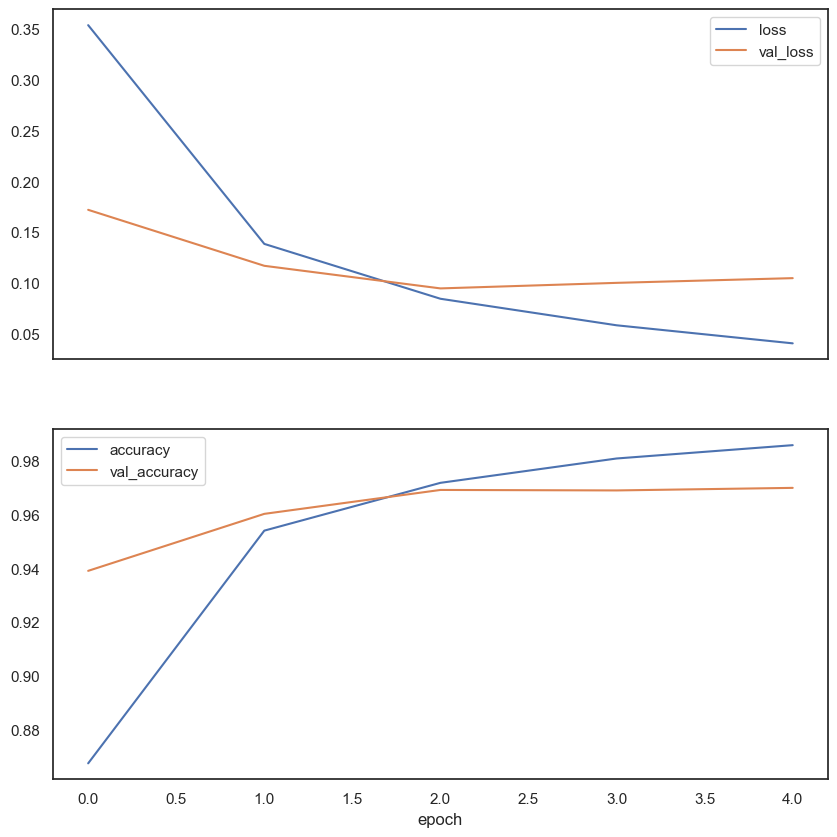

In [104]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
df_distilbert.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
df_distilbert.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

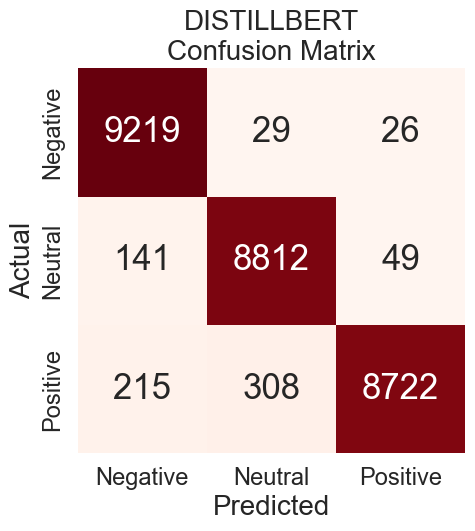

In [105]:
conf_matrix(y_test.argmax(1), y_pred_distilbert.argmax(1),'DISTILLBERT\nConfusion Matrix') #generate confusion matrix

In [106]:
model3.save('model_distilbert.h5') #save model

## BERT

In [107]:
MAX_LEN=256

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(data,max_len=MAX_LEN) :
    
    input_ids = []
    attention_masks = []
    
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(data[i],
                                        add_special_tokens=True,
                                        max_length=MAX_LEN,
                                        truncation=True,
                                        padding='max_length',
                                        return_attention_mask=True)
        
        input_ids.append(encoded['input_ids'])
        
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)


#apply the tokenizer function to the train, validation and test sets
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)

val_input_ids, val_attention_masks = tokenize(X_val, MAX_LEN)

test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [108]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')  #import the BERT model from the pretrained library

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [109]:
num_classes=3
def create_model(bert_model, max_len, num_classes):
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

   
    sequence_output = bert_model([input_ids, attention_masks])[0]

    # Apply GRU layer with return sequences to capture sequential information
    gru_output = tf.keras.layers.GRU(128, return_sequences=True)(sequence_output)

    # Apply attention mechanism to focus on important features
    attention = tf.keras.layers.Attention()([gru_output, gru_output])

    # Apply global average pooling and global max pooling
    avg_pooling = tf.keras.layers.GlobalAveragePooling1D()(attention)
    max_pooling = tf.keras.layers.GlobalMaxPooling1D()(attention)

    # Concatenate the average pooling and max pooling representations
    concat = tf.keras.layers.Concatenate()([avg_pooling, max_pooling])

    # Add a dense layer with dropout for classification
    x = tf.keras.layers.Dense(256, activation='relu')(concat)
    x = tf.keras.layers.Dropout(0.5)(x)

    # Output layer with softmax activation for classification
    output = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Create the model
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compile the model with appropriate optimizer and loss function
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    #Implement learning rate scheduling
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

    # Implement early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    return model

In [110]:
model4 = create_model(bert_model,MAX_LEN,num_classes)
model4.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                         

In [111]:
history_bert = model4.fit([train_input_ids, train_attention_masks],y_train,validation_data=([val_input_ids, val_attention_masks],y_valid),
epochs=5, batch_size=32)

Epoch 1/5


2023-12-05 15:20:38.115807: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x256x1x768xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x256x1x768xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x12x256x256xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerf

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x256xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x256x1x768xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerform

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x256x1x768xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<32x12x256x256xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerf

2752/2752 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.8651

2023-12-05 17:22:52.191139: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


2752/2752 [==============================] - 7790s 3s/step - loss: 0.3590 - accuracy: 0.8651 - val_loss: 0.1838 - val_accuracy: 0.9366
Epoch 2/5
2752/2752 [==============================] - 7774s 3s/step - loss: 0.1424 - accuracy: 0.9524 - val_loss: 0.1314 - val_accuracy: 0.9589
Epoch 3/5
2752/2752 [==============================] - 7961s 3s/step - loss: 0.0894 - accuracy: 0.9695 - val_loss: 0.1193 - val_accuracy: 0.9622
Epoch 4/5
1799/2752 [==================>...........] - ETA: 42:56 - loss: 0.0628 - accuracy: 0.9790

In [119]:
result_bert = model4.predict([test_input_ids,test_attention_masks])

861/861 [==============================] - 608s 706ms/step


In [120]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1
print('\tClassification Report for DISTILBERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for DISTILBERT:

               precision    recall  f1-score   support

    Negative       0.98      0.99      0.98      9274
     Neutral       0.97      0.98      0.98      9002
    Positive       0.99      0.96      0.97      9245

   micro avg       0.98      0.98      0.98     27521
   macro avg       0.98      0.98      0.98     27521
weighted avg       0.98      0.98      0.98     27521
 samples avg       0.98      0.98      0.98     27521



In [121]:
df_bert = pd.DataFrame(history_bert.history)
df_bert["epoch"] = history_bert.epoch
df_bert

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.358959,0.865132,0.183829,0.936592,0
1,0.142448,0.952421,0.131426,0.958939,1
2,0.089415,0.969511,0.119305,0.962209,2
3,0.061250,0.978958,0.077216,0.975382,3
4,0.043414,0.985374,0.070772,0.978152,4


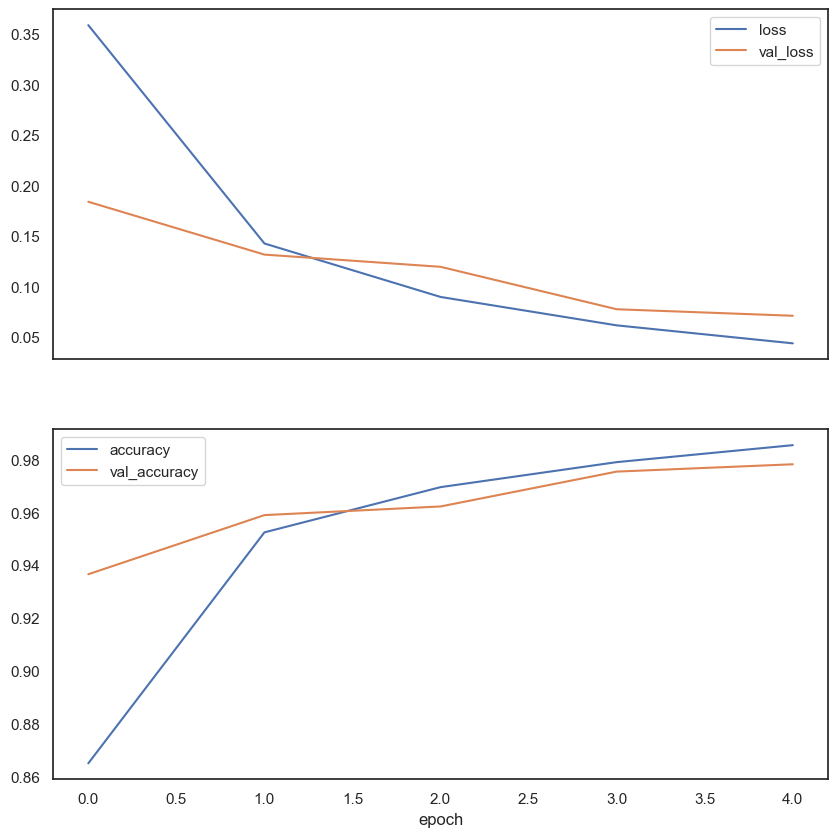

In [122]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 10))
df_bert.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
df_bert.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

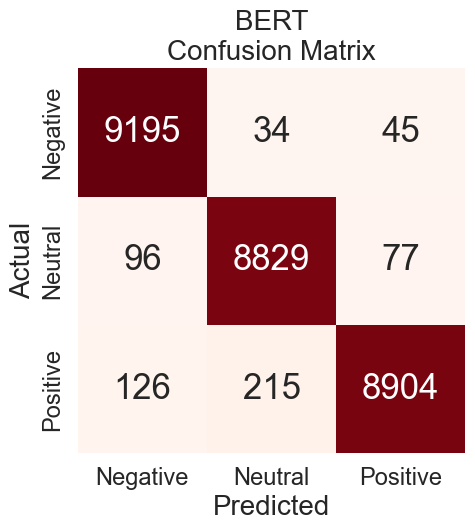

In [123]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT\nConfusion Matrix')

In [124]:
model4.save('model_bert.h5') #save model

## HYPERPARAMETER TUNNING FOR NAIVE BAYES

In [125]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False],  # Whether to learn class prior probabilities or not
}

# Perform Grid Search with Cross-Validation
nb_classifier = MultinomialNB()
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tf, y_train_le)

# Step 6: Evaluate Results
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Step 7: Evaluate the best model on the validation set
best_nb_classifier = MultinomialNB(alpha=best_params['alpha'], fit_prior=best_params['fit_prior'])
best_nb_classifier.fit(X_train_tf, y_train_le)
y_pred = best_nb_classifier.predict(X_val_tf)
accuracy_on_val_set = accuracy_score(y_valid_le, y_pred)
print("Accuracy on Validation Set:", accuracy_on_val_set)

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Accuracy: 0.8184502879489204
Accuracy on Validation Set: 0.8244912790697675


In [126]:
joblib.dump(best_nb_classifier, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']